In [1]:
import pandas as pd
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import onekey_algo.custom.components as okcomp
from onekey_algo import get_param_in_cwd

plt.rcParams['figure.dpi'] = 300
model_names = get_param_in_cwd('compare_algos')
# 获取配置
task = get_param_in_cwd('task_column')
sel_m = get_param_in_cwd('sel_model')
labelf = get_param_in_cwd('label_file') or os.path.join(mydir, 'label.csv')
group_info = get_param_in_cwd('dataset_column') or 'group'

# 读取label文件。
labels = [task]
label_data_ = pd.read_csv(labelf)
label_data_['ID'] = label_data_['ID'].map(lambda x: f"{x}.nii.gz" if not (f"{x}".endswith('.nii.gz') or  f"{x}".endswith('.nii')) else x)
label_data_ = label_data_[['ID', group_info, task]]
label_data_ = label_data_.dropna(axis=0)

ids = label_data_['ID']
print(label_data_.columns)
label_data = label_data_
label_data

Index(['ID', 'group', 'label'], dtype='object')


,ID,group,label
0,tanchuanbing5.nii.gz,train,1
1,lianglixian5.nii.gz,train,0
2,qinshangde5.nii.gz,train,0
3,huanglihong5.nii.gz,train,1
4,zhaoguichun5.nii.gz,train,0
...,...,...,...
95,jiangqingfeng5.nii.gz,test,1
96,nongmeihua5.nii.gz,test,1
97,yechaojun5.nii.gz,test,1
98,liuchenkang5.nii.gz,test,0


# 训练集-Nomogram

,ID,-0_x,Radiomics_LR,-0_y,Radiomics_SVM,-0_x,Radiomics_RandomForest,-0_y,Radiomics_XGBoost,-0,Clinic_LR,suoguxia,group,label
0,bicongzhi5.nii.gz,0.574,0.426,0.446,0.554,0.658,0.342,0.433,0.567,0.270,0.730,1,train,1
1,caoyongling5.nii.gz,0.603,0.397,0.448,0.552,0.658,0.342,0.621,0.379,0.581,0.419,0,train,0
2,chenfuxiu5.nii.gz,0.379,0.621,0.431,0.569,0.118,0.882,0.142,0.858,0.270,0.730,1,train,1
3,chenyafeng5.nii.gz,0.606,0.394,0.446,0.554,0.587,0.413,0.433,0.567,0.270,0.730,1,train,1
4,danshuyang5.nii.gz,0.668,0.332,0.461,0.539,0.603,0.397,0.551,0.449,0.581,0.419,0,train,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,zengming5.nii.gz,0.420,0.580,0.433,0.567,0.118,0.882,0.430,0.570,0.270,0.730,1,train,1
76,zhanxiulin5.nii.gz,0.397,0.603,0.433,0.567,0.466,0.534,0.767,0.233,0.581,0.419,0,train,0
77,zhaoguichun5.nii.gz,0.559,0.441,0.446,0.554,0.747,0.253,0.803,0.197,0.581,0.419,0,train,0
78,zhongguoxiong5.nii.gz,0.330,0.670,0.427,0.573,0.251,0.749,0.204,0.796,0.270,0.730,1,train,1


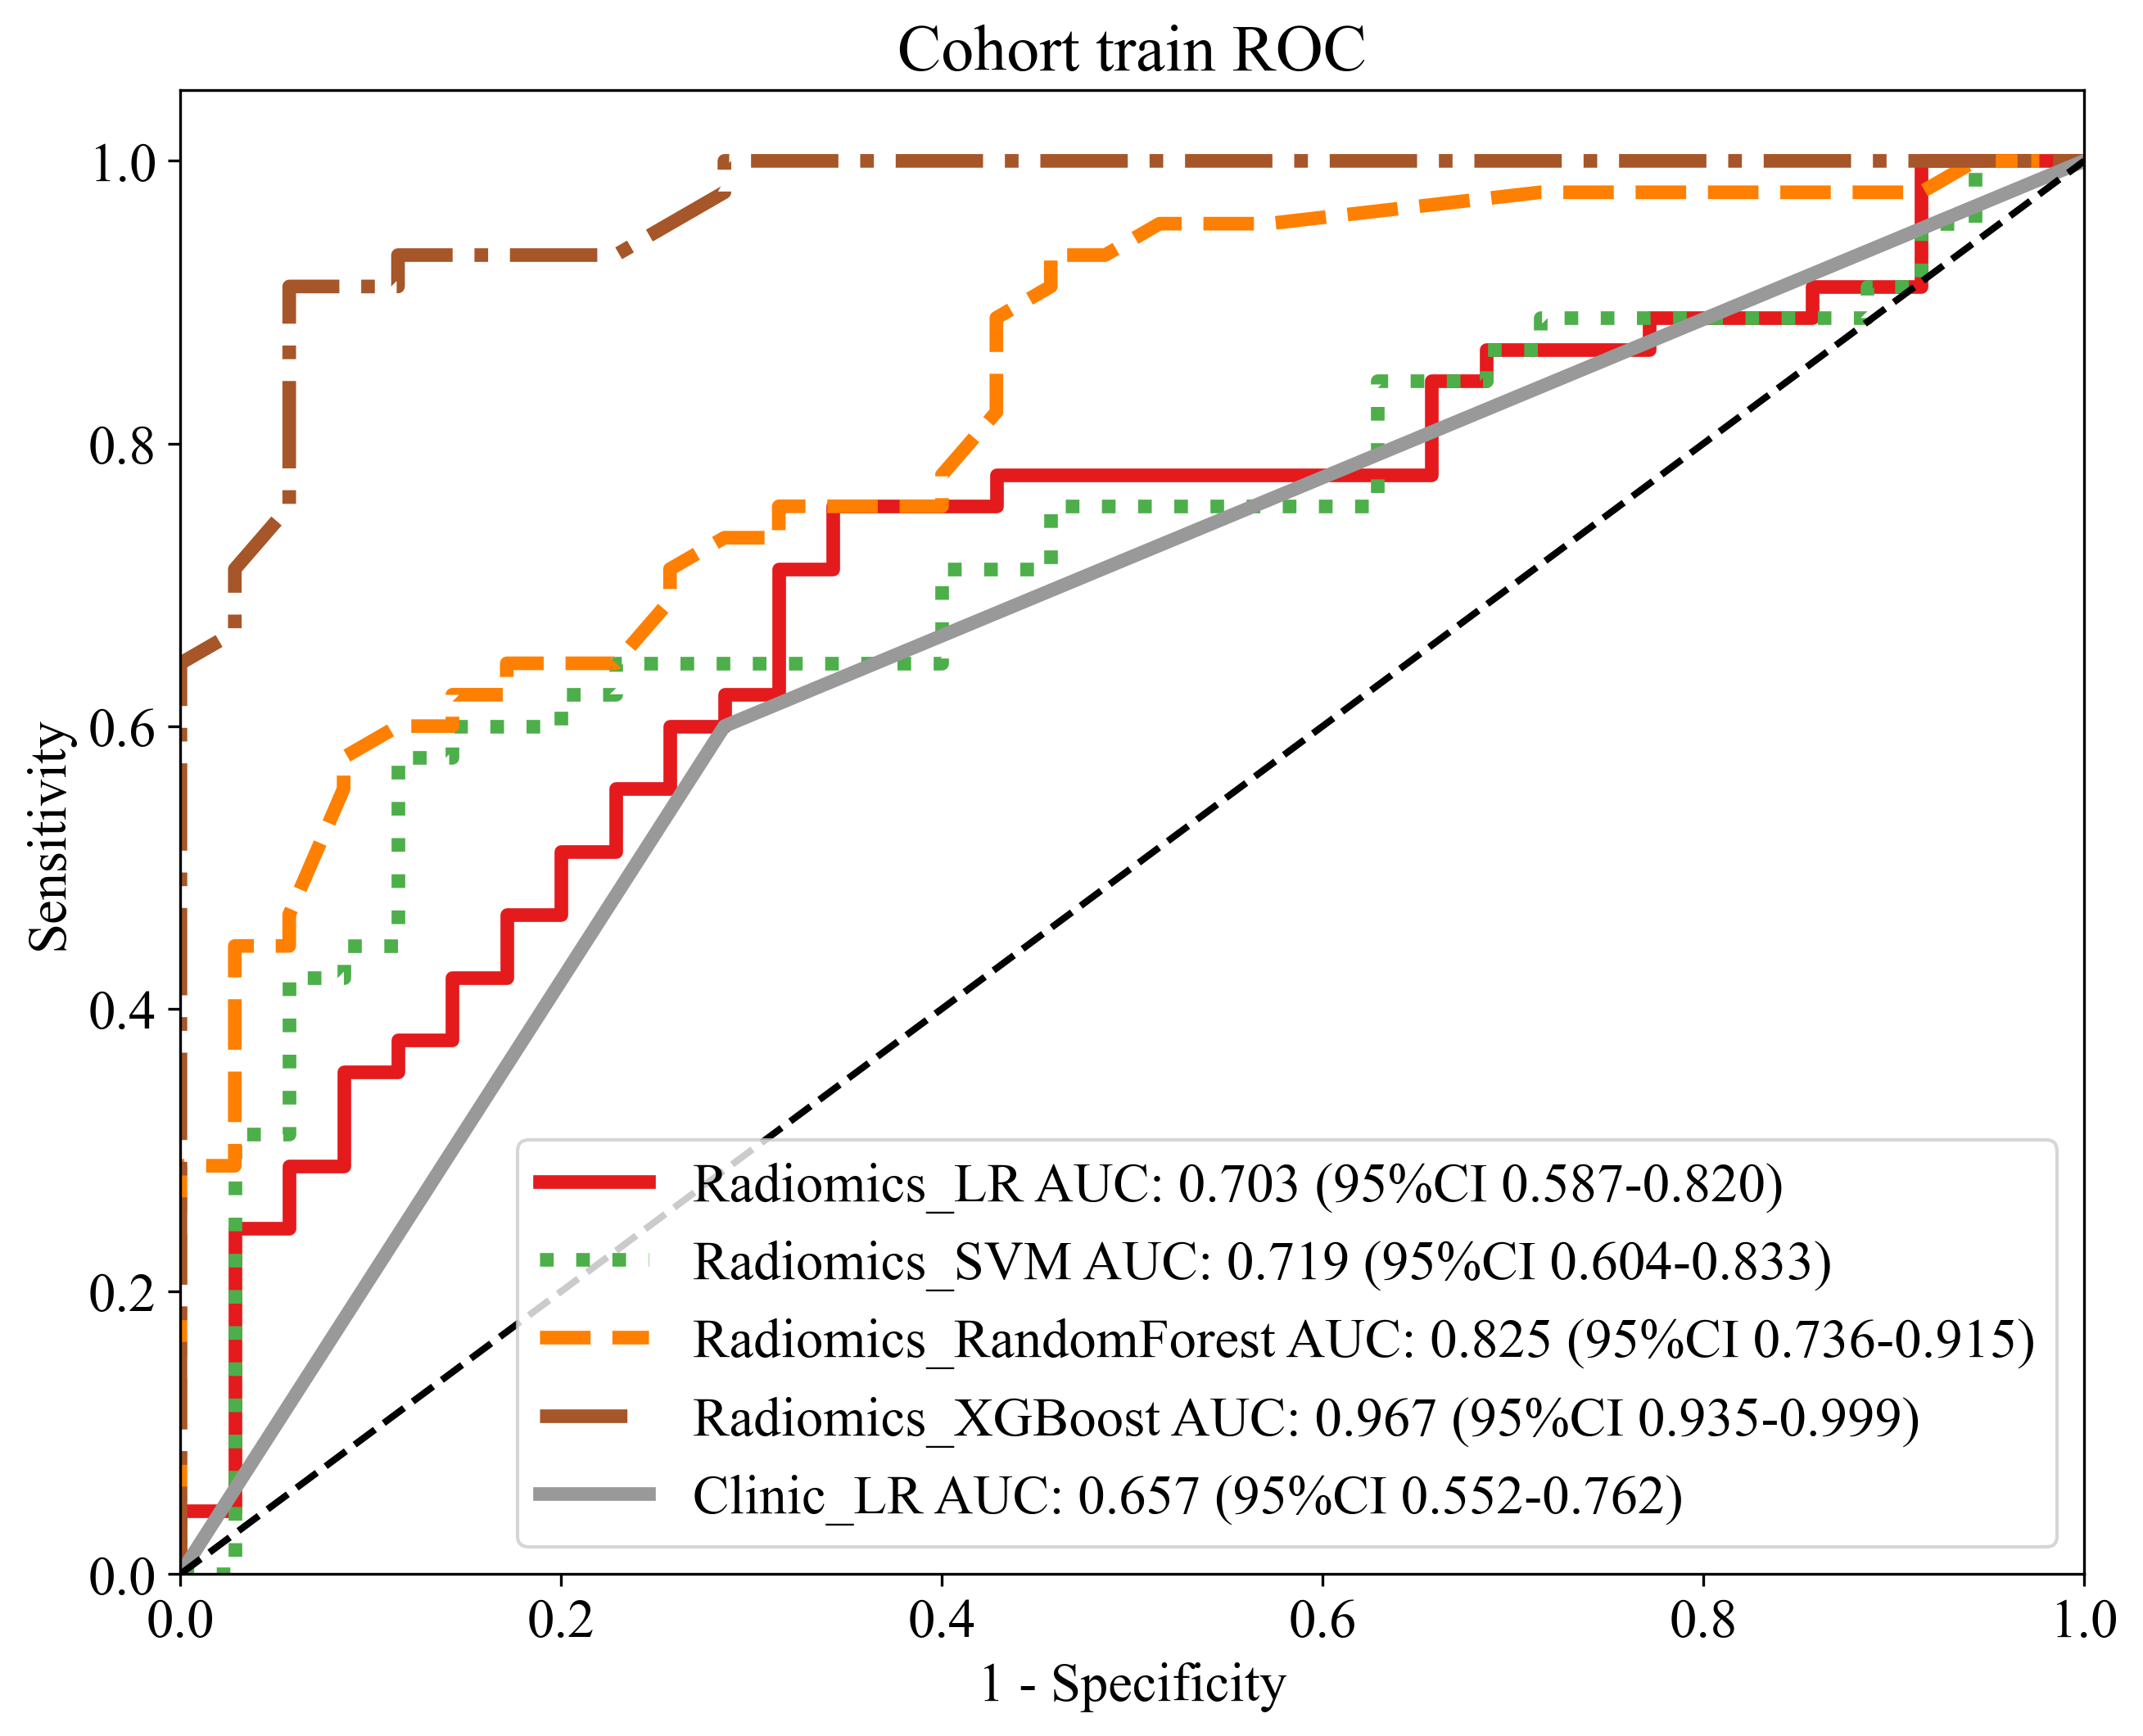

,Signature,Accuracy,AUC,95% CI,Sensitivity,Specificity,PPV,NPV,Precision,Recall,F1,Threshold,Cohort
0,Radiomics_LR,0.713,0.703,0.5875 - 0.8195,0.756,0.657,0.739,0.676,0.739,0.756,0.747,0.543,train
1,Radiomics_SVM,0.713,0.719,0.6045 - 0.8330,0.578,0.886,0.867,0.620,0.867,0.578,0.693,0.568,train
2,Radiomics_RandomForest,0.725,0.825,0.7362 - 0.9145,0.578,0.914,0.897,0.627,0.897,0.578,0.703,0.624,train
3,Radiomics_XGBoost,0.925,0.967,0.9354 - 0.9992,0.911,0.943,0.953,0.892,0.953,0.911,0.932,0.537,train
4,Clinic_LR,0.650,0.657,0.5522 - 0.7620,0.600,0.714,0.730,0.581,0.730,0.600,0.659,0.730,train


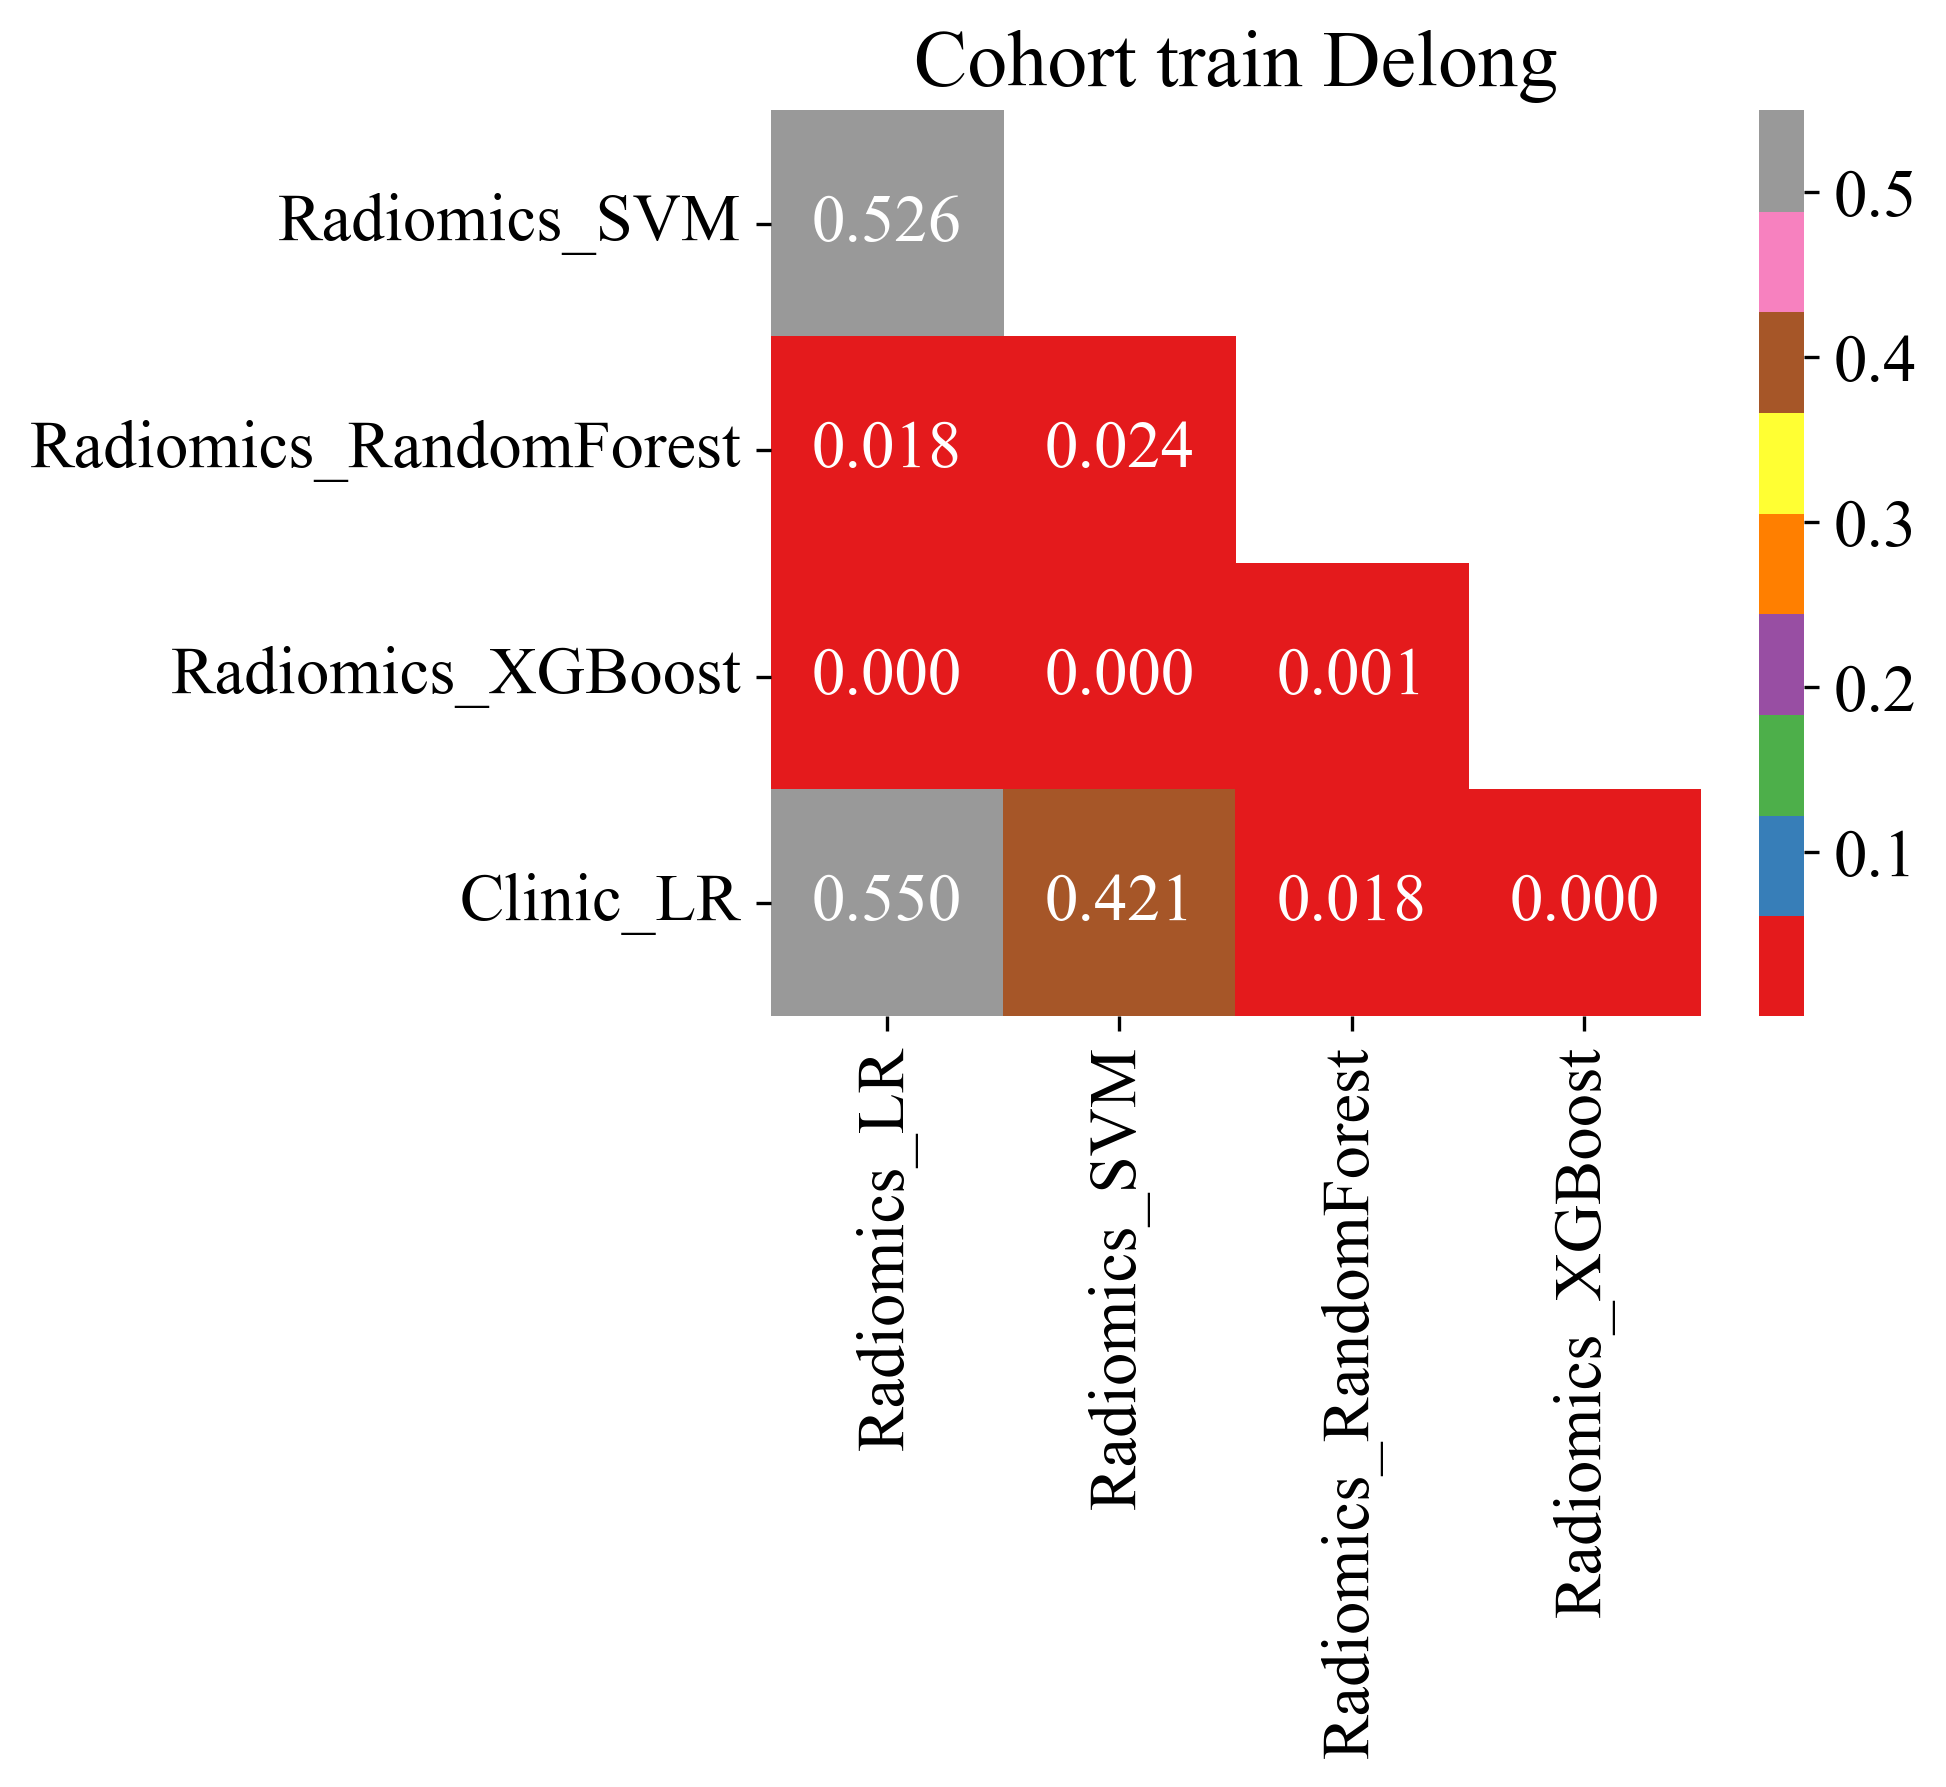

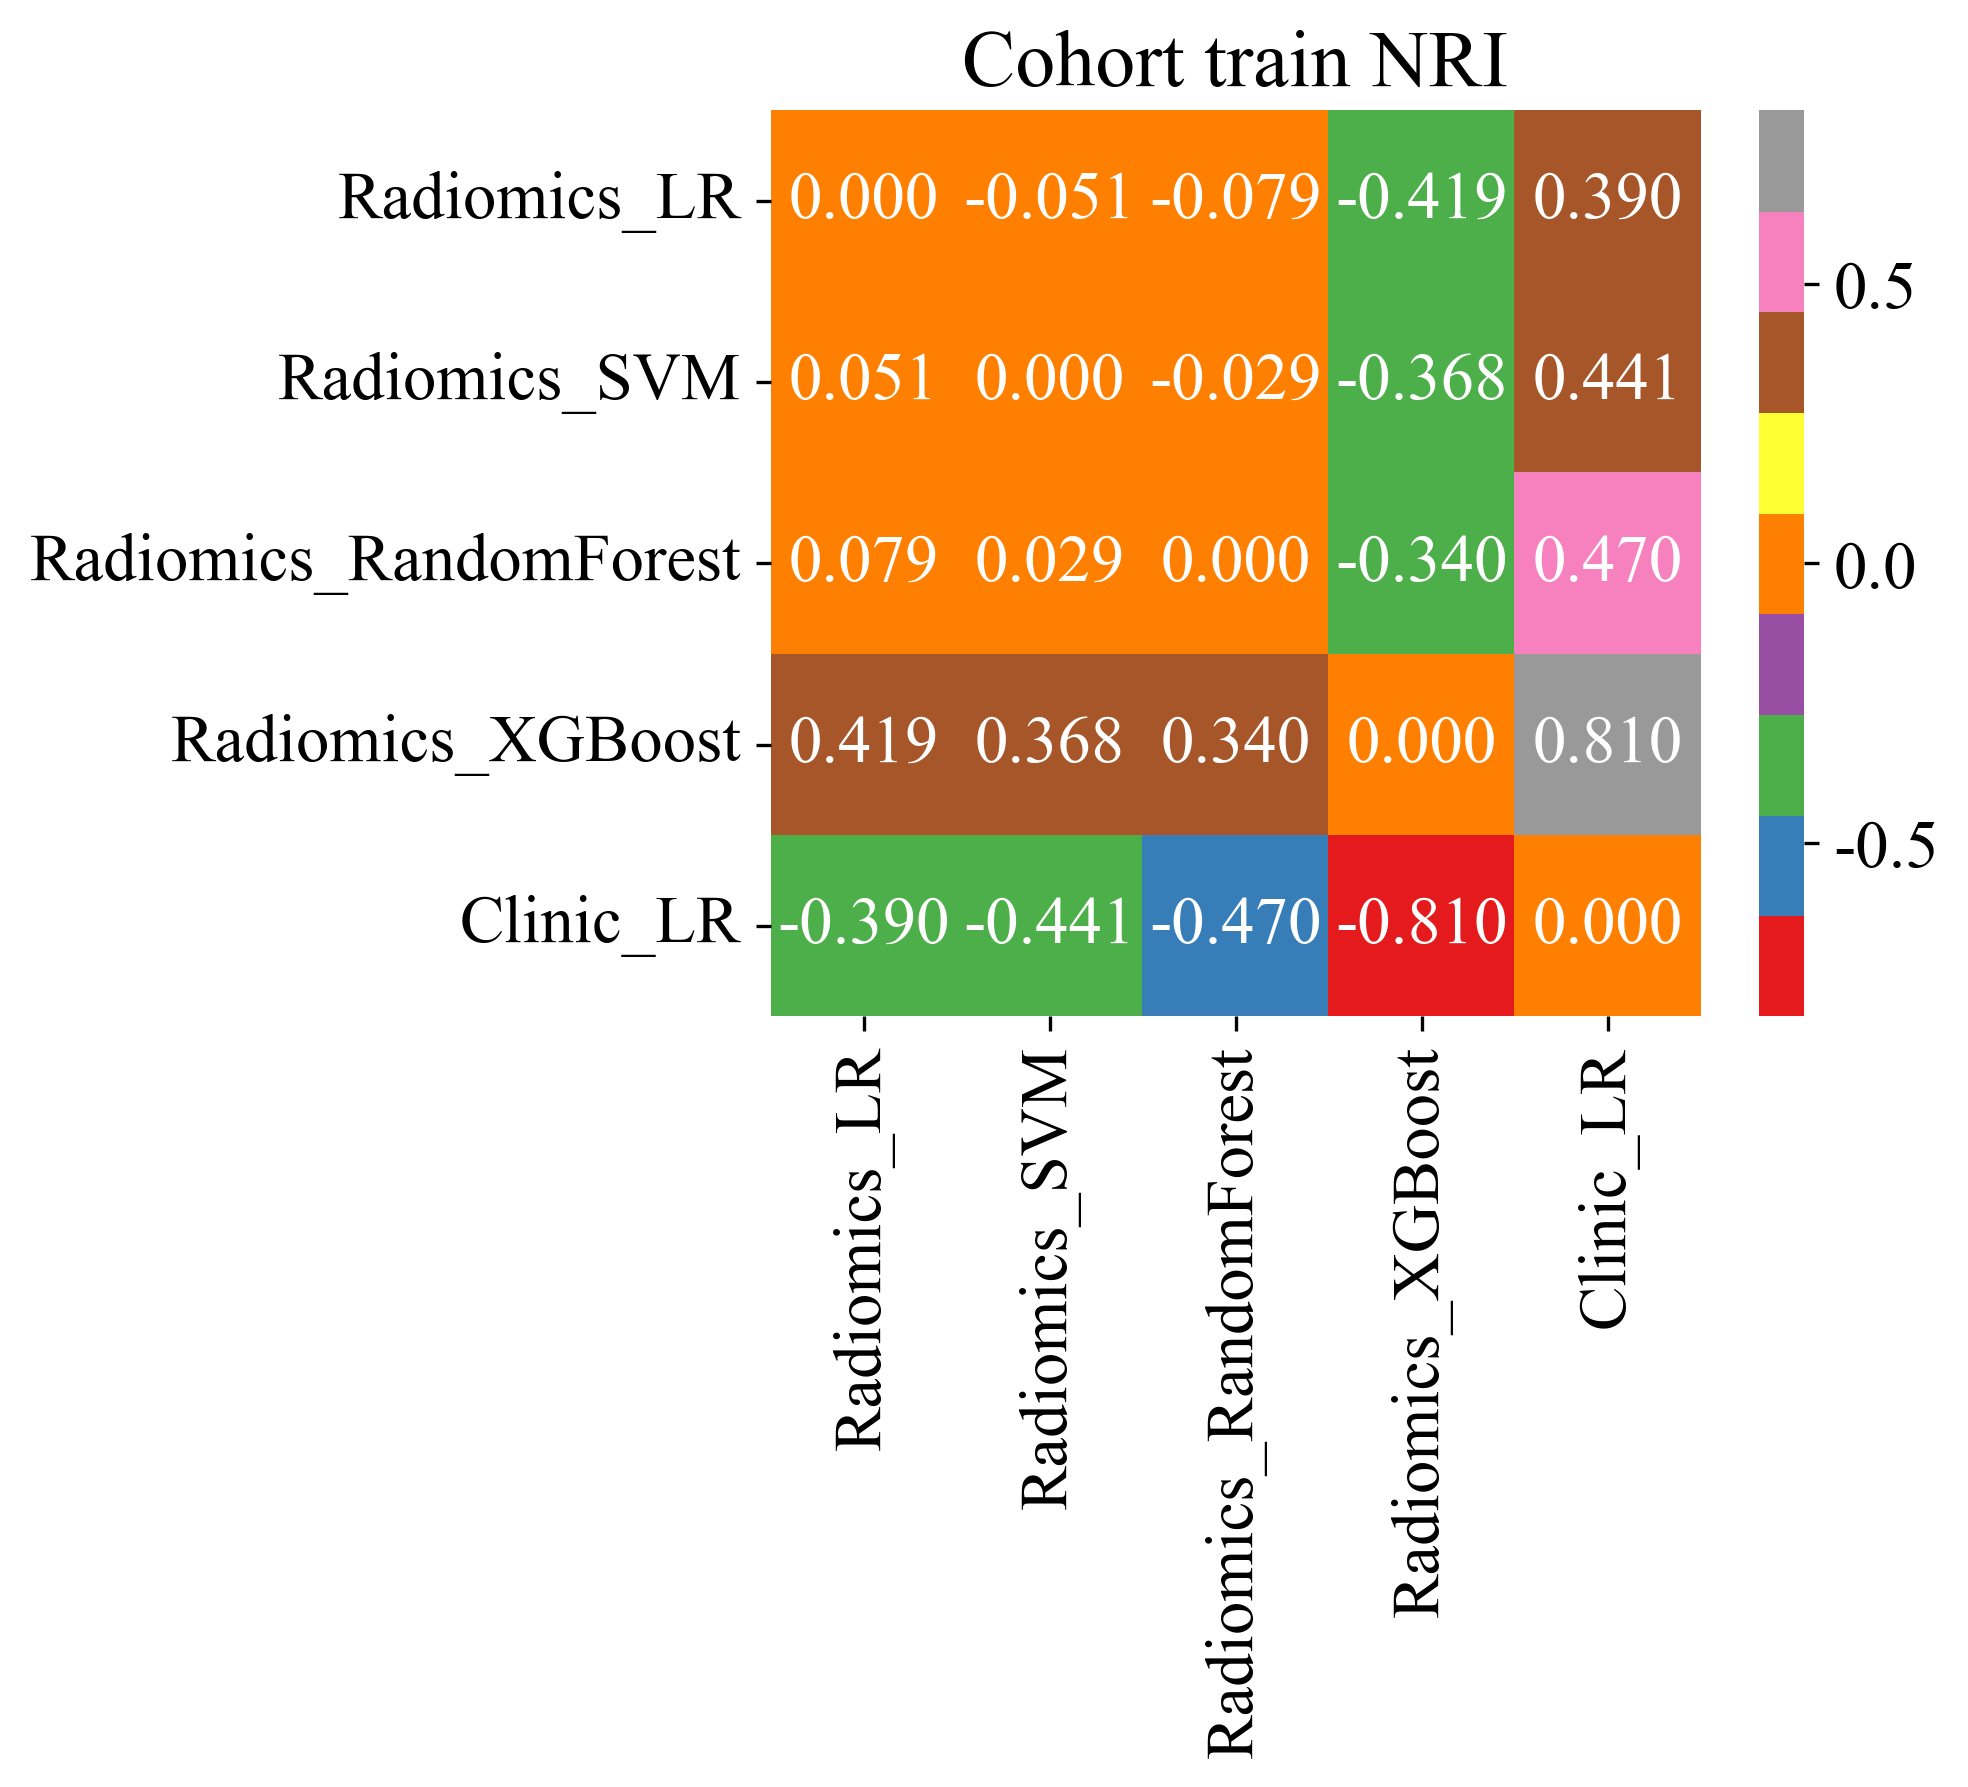

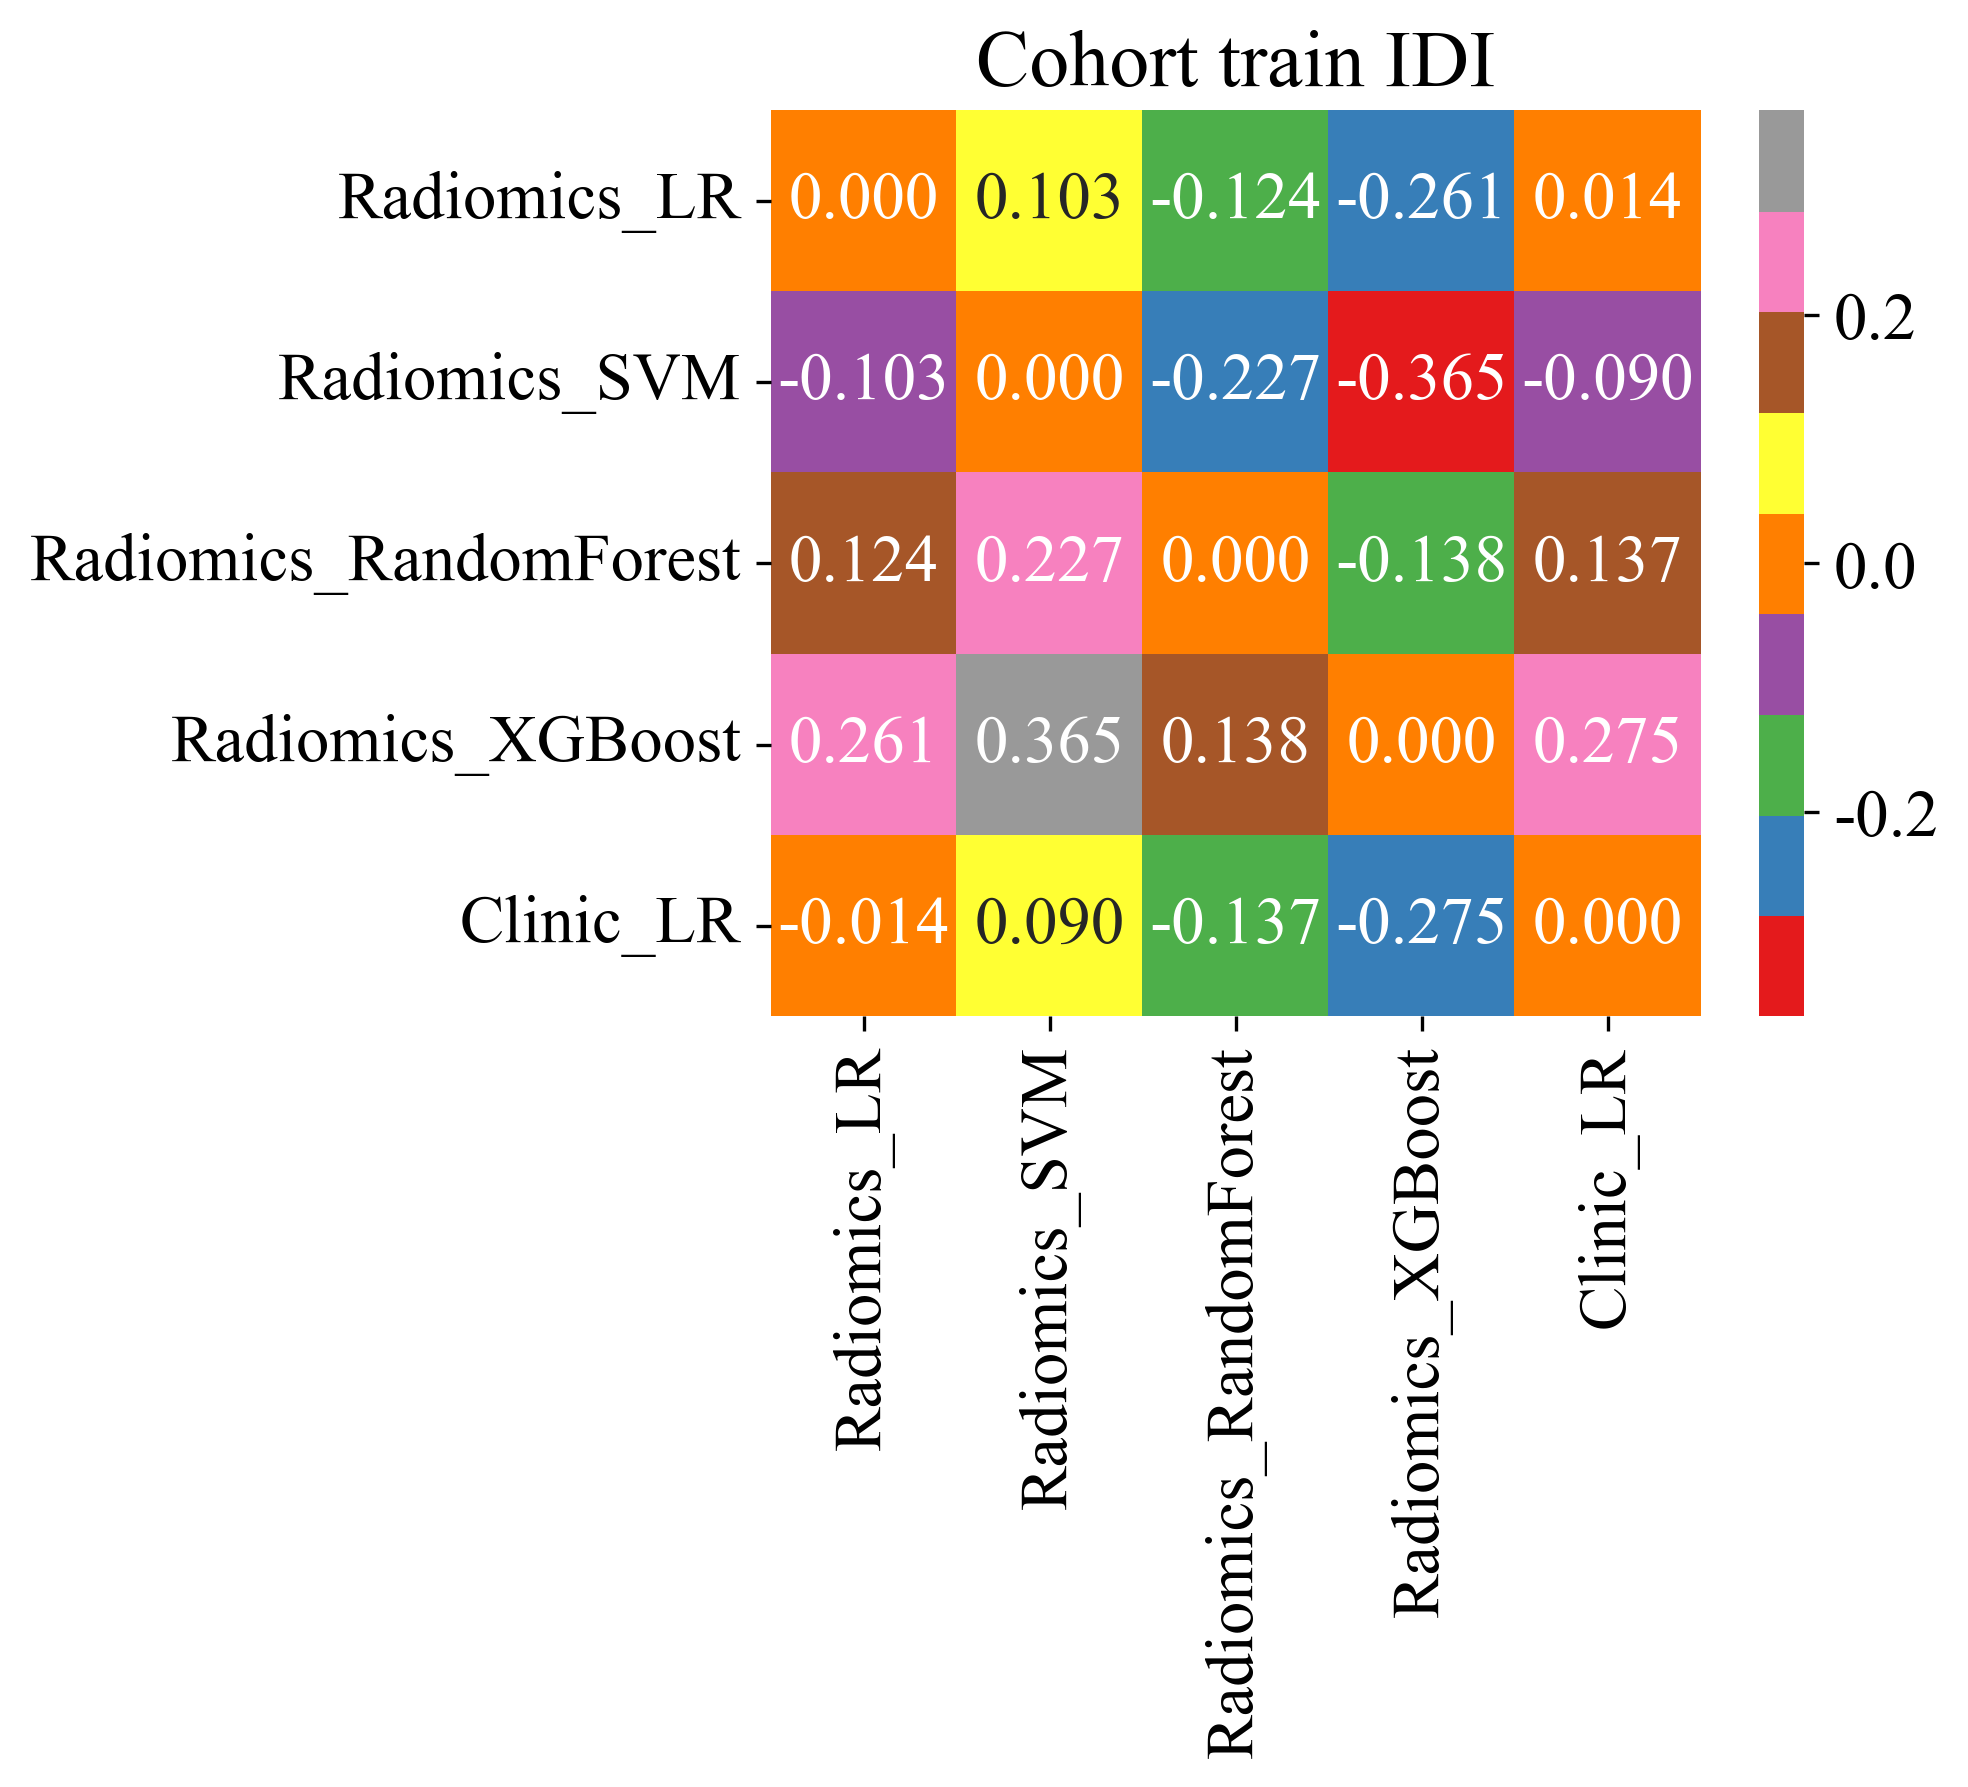

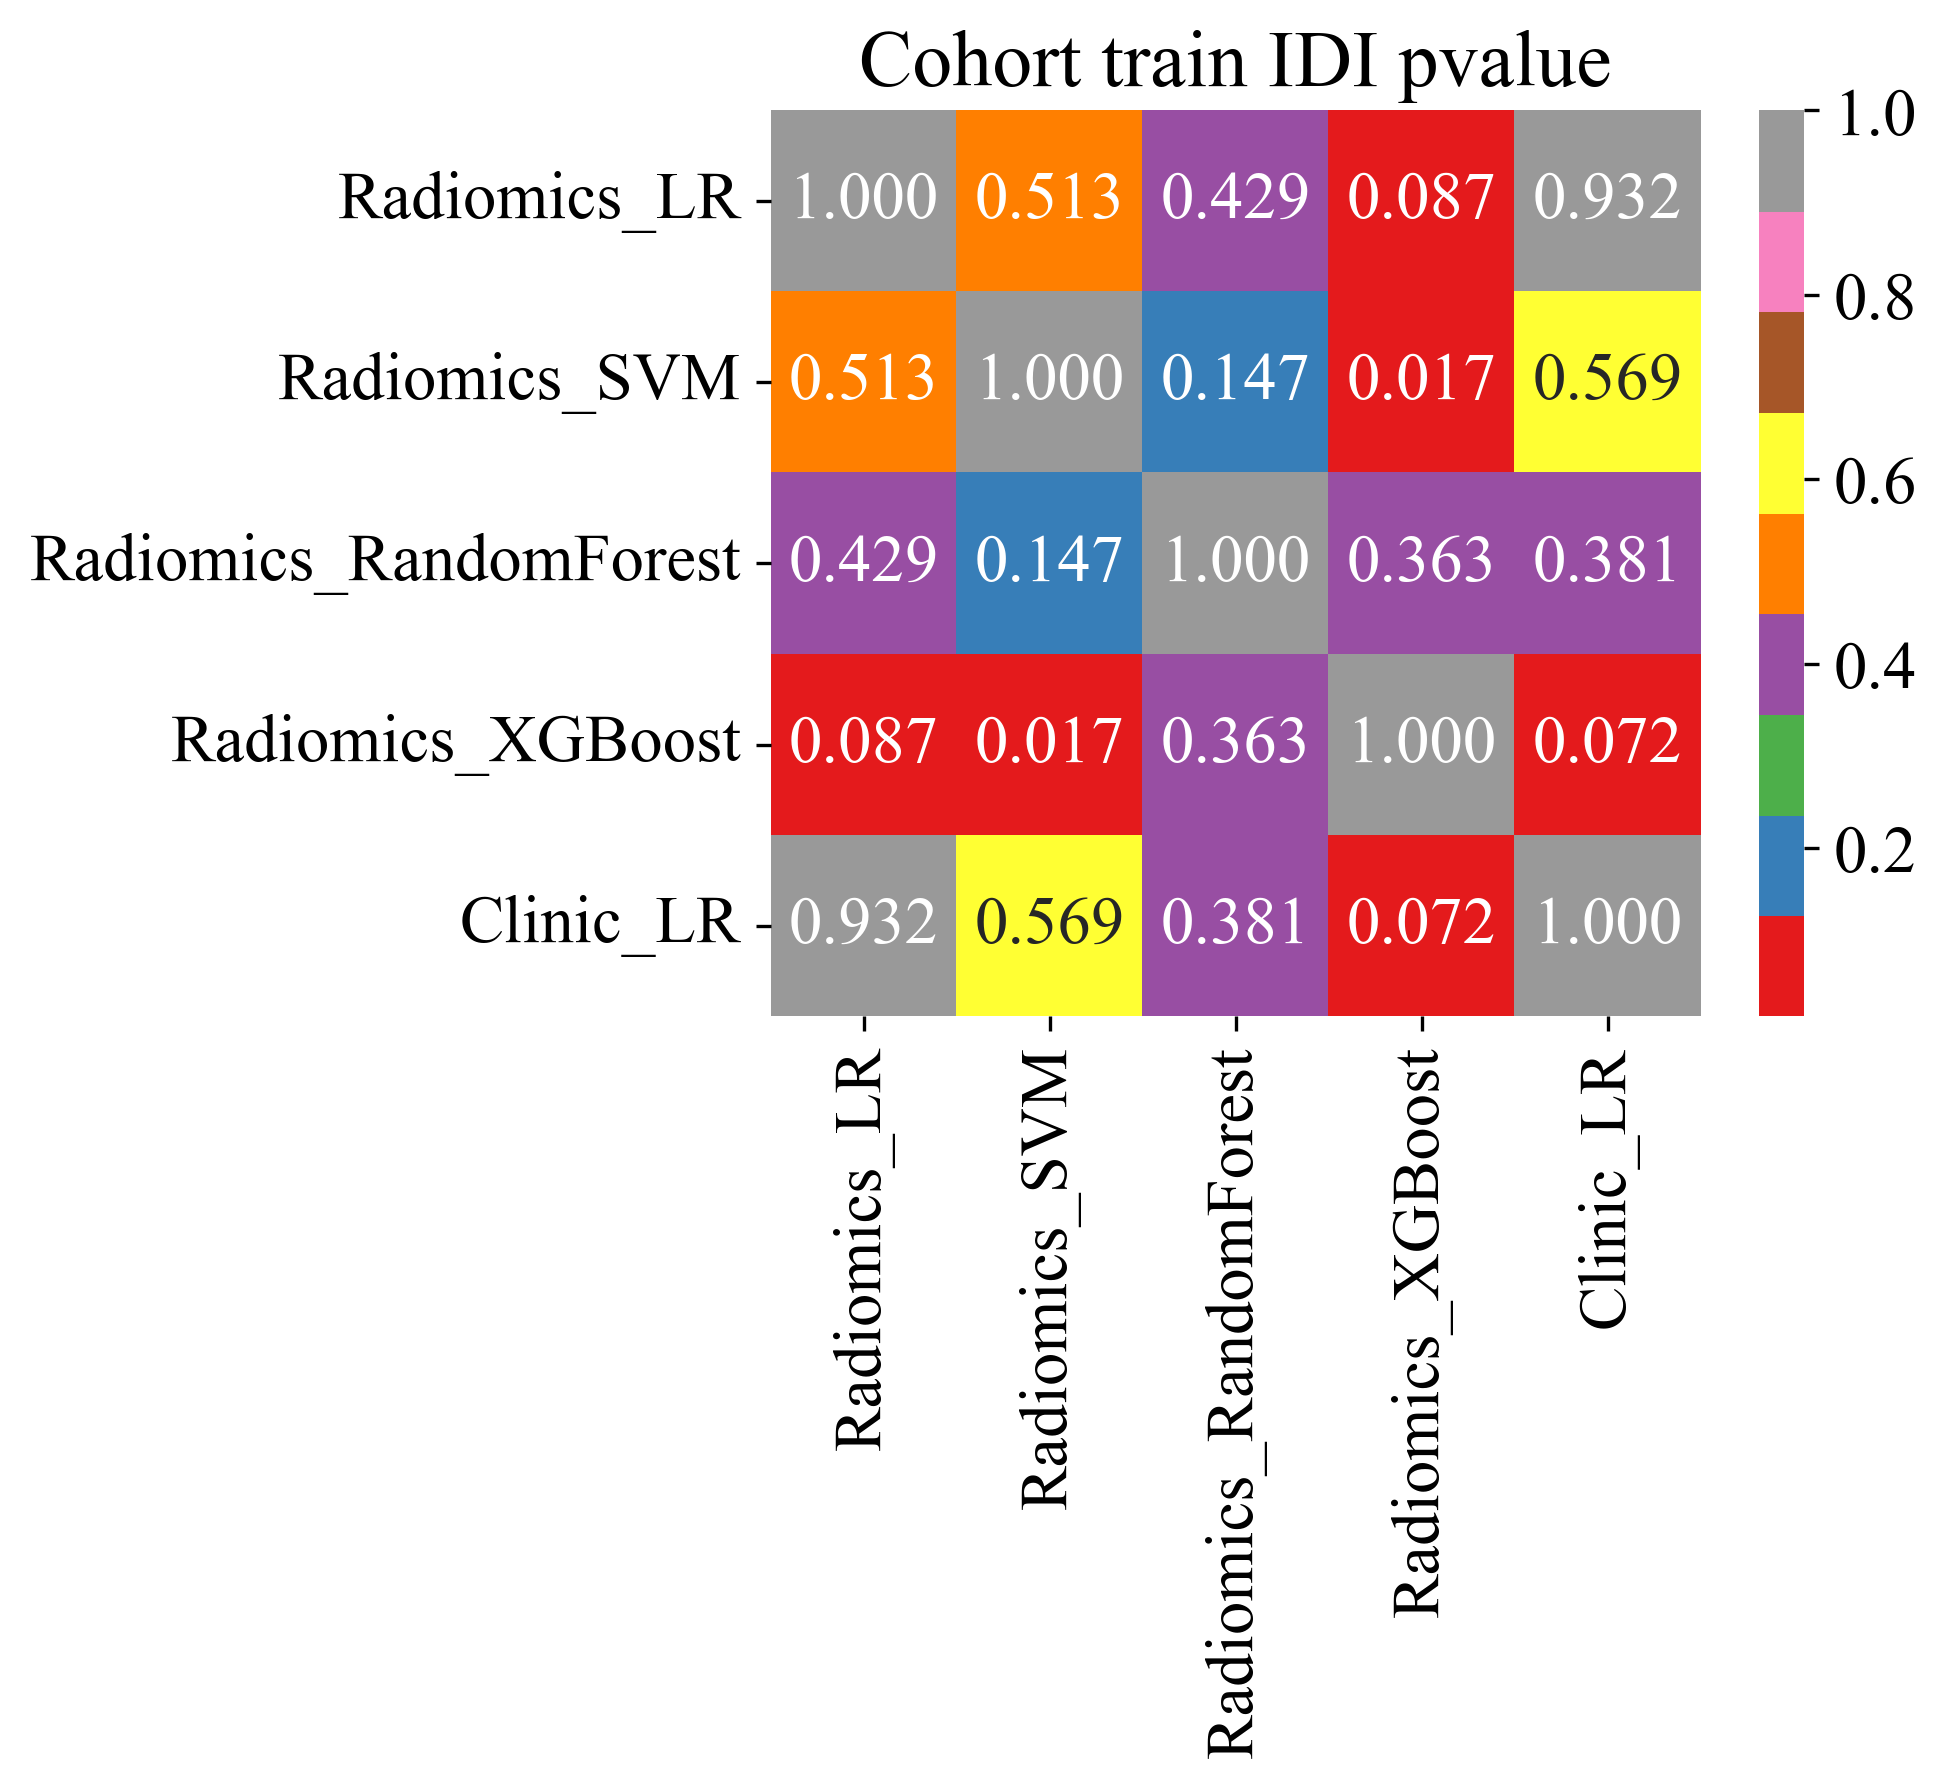

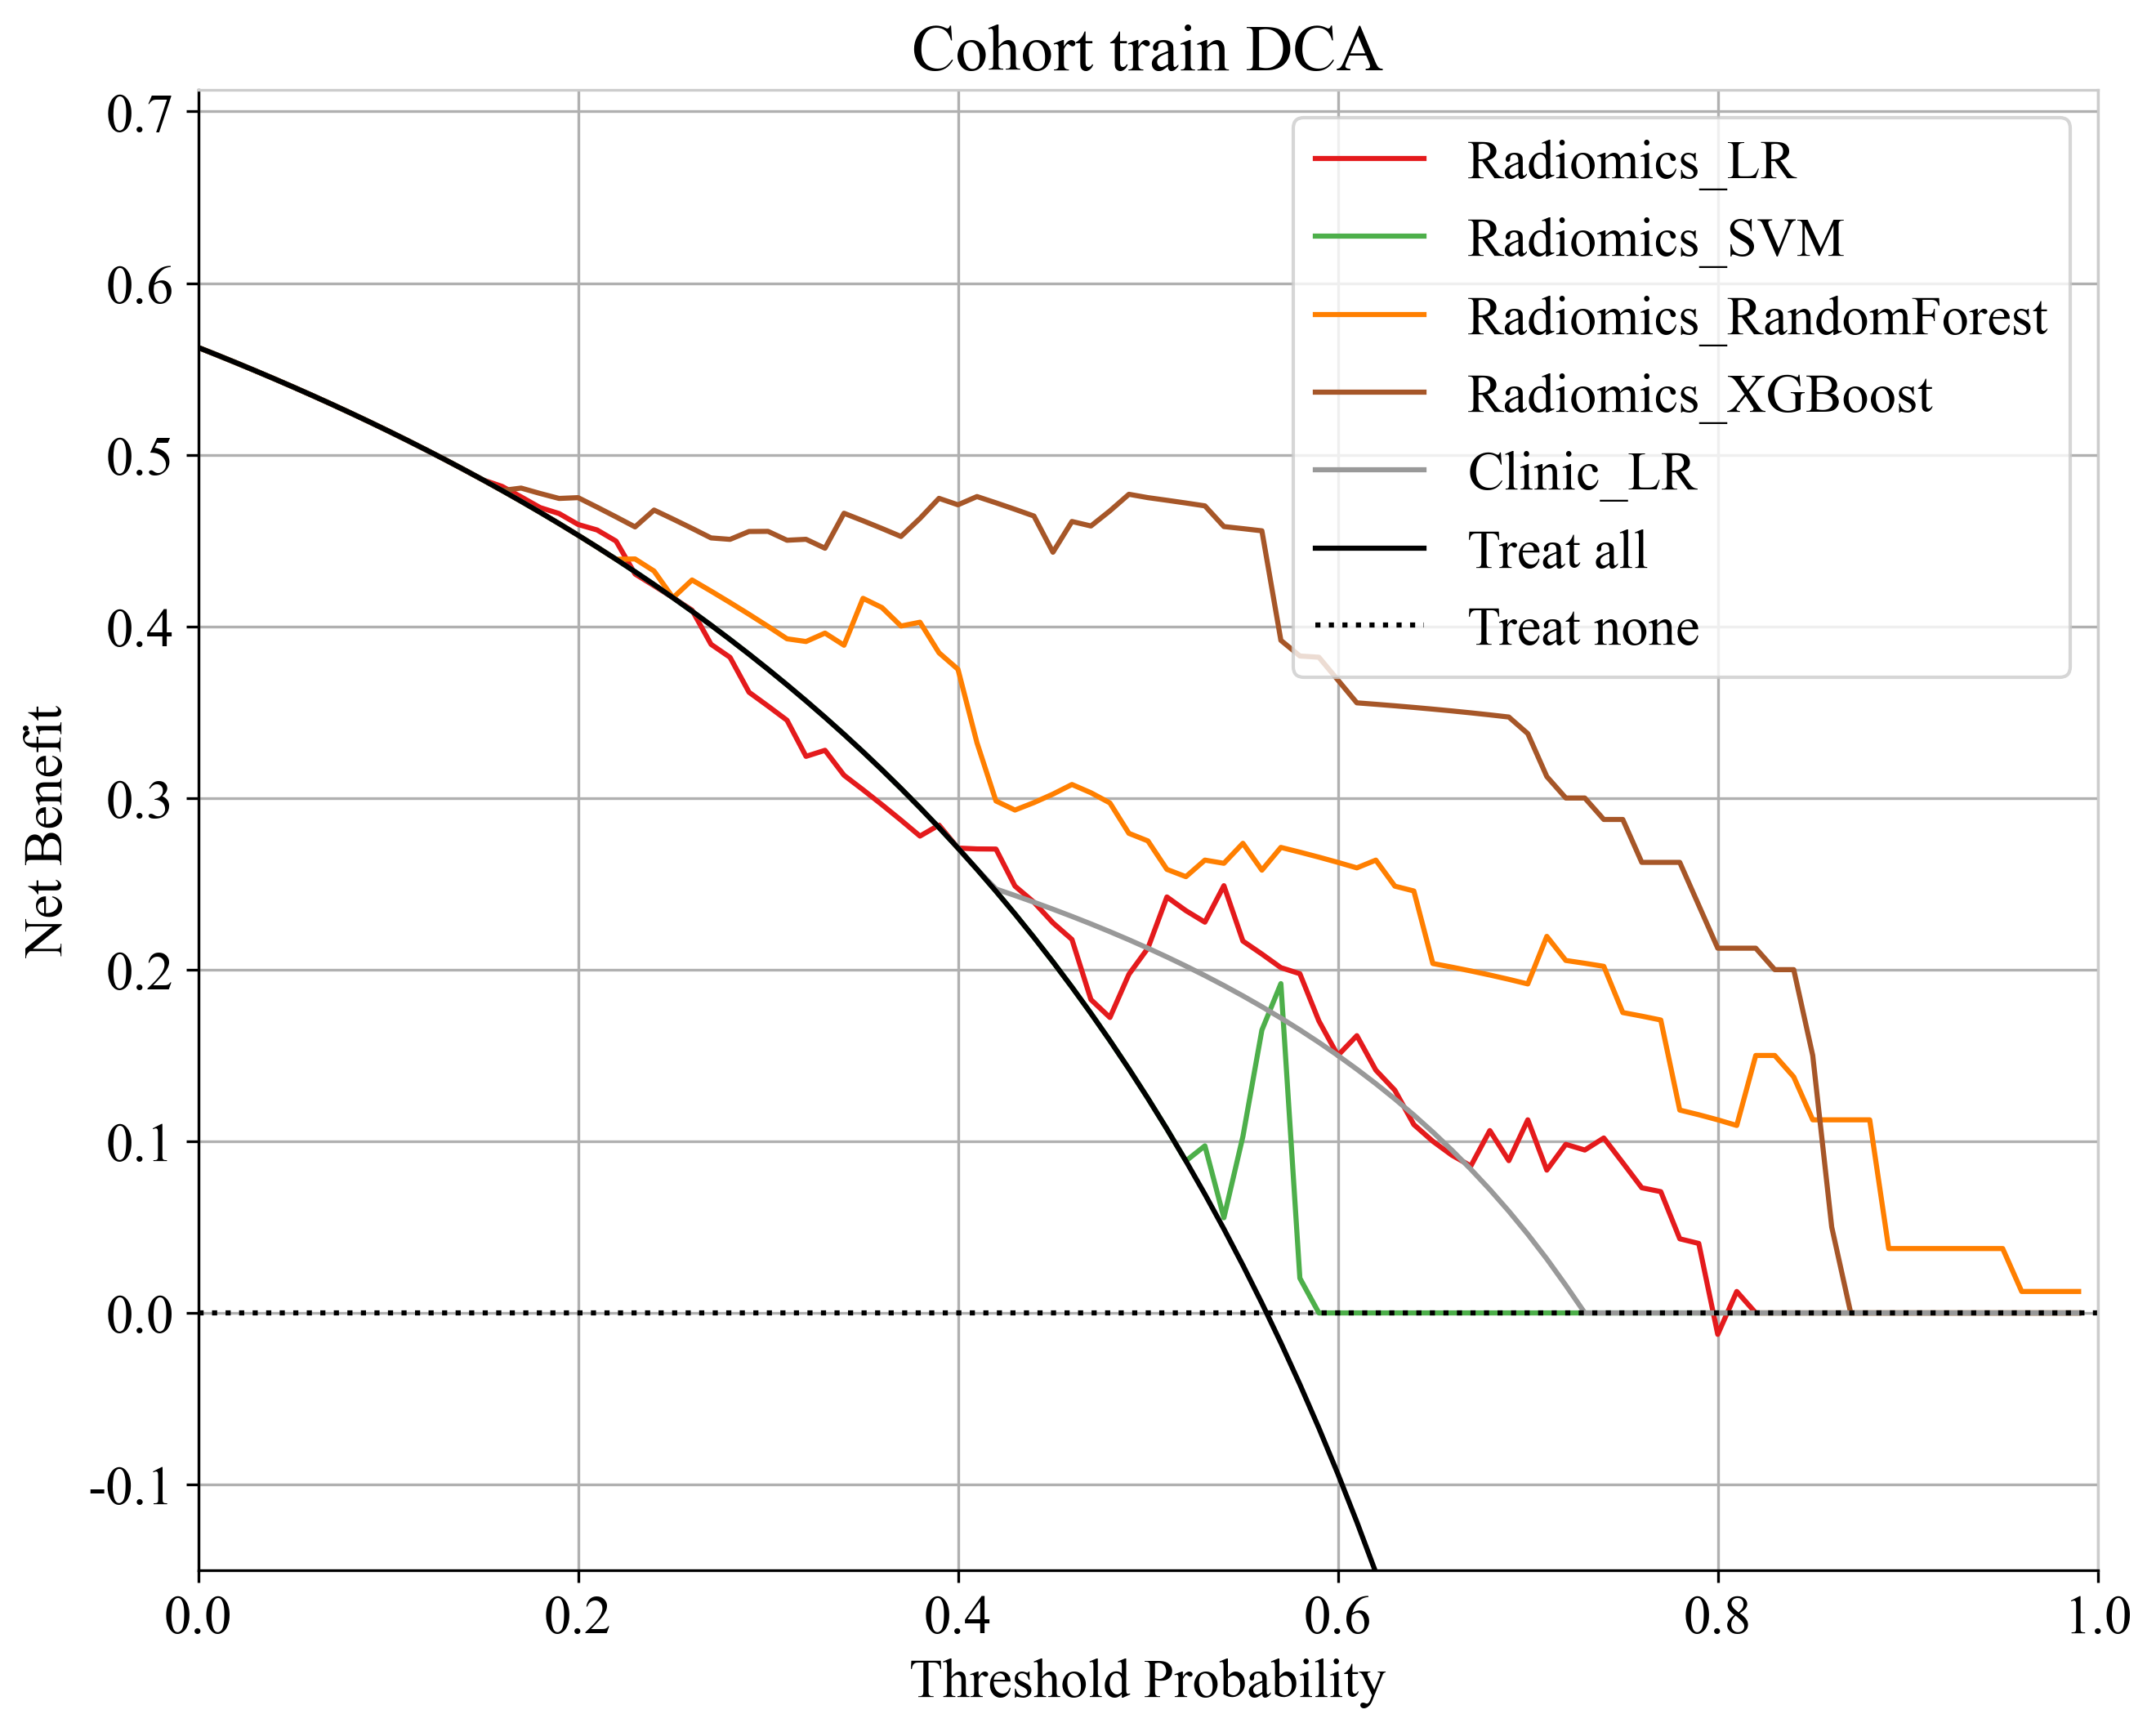

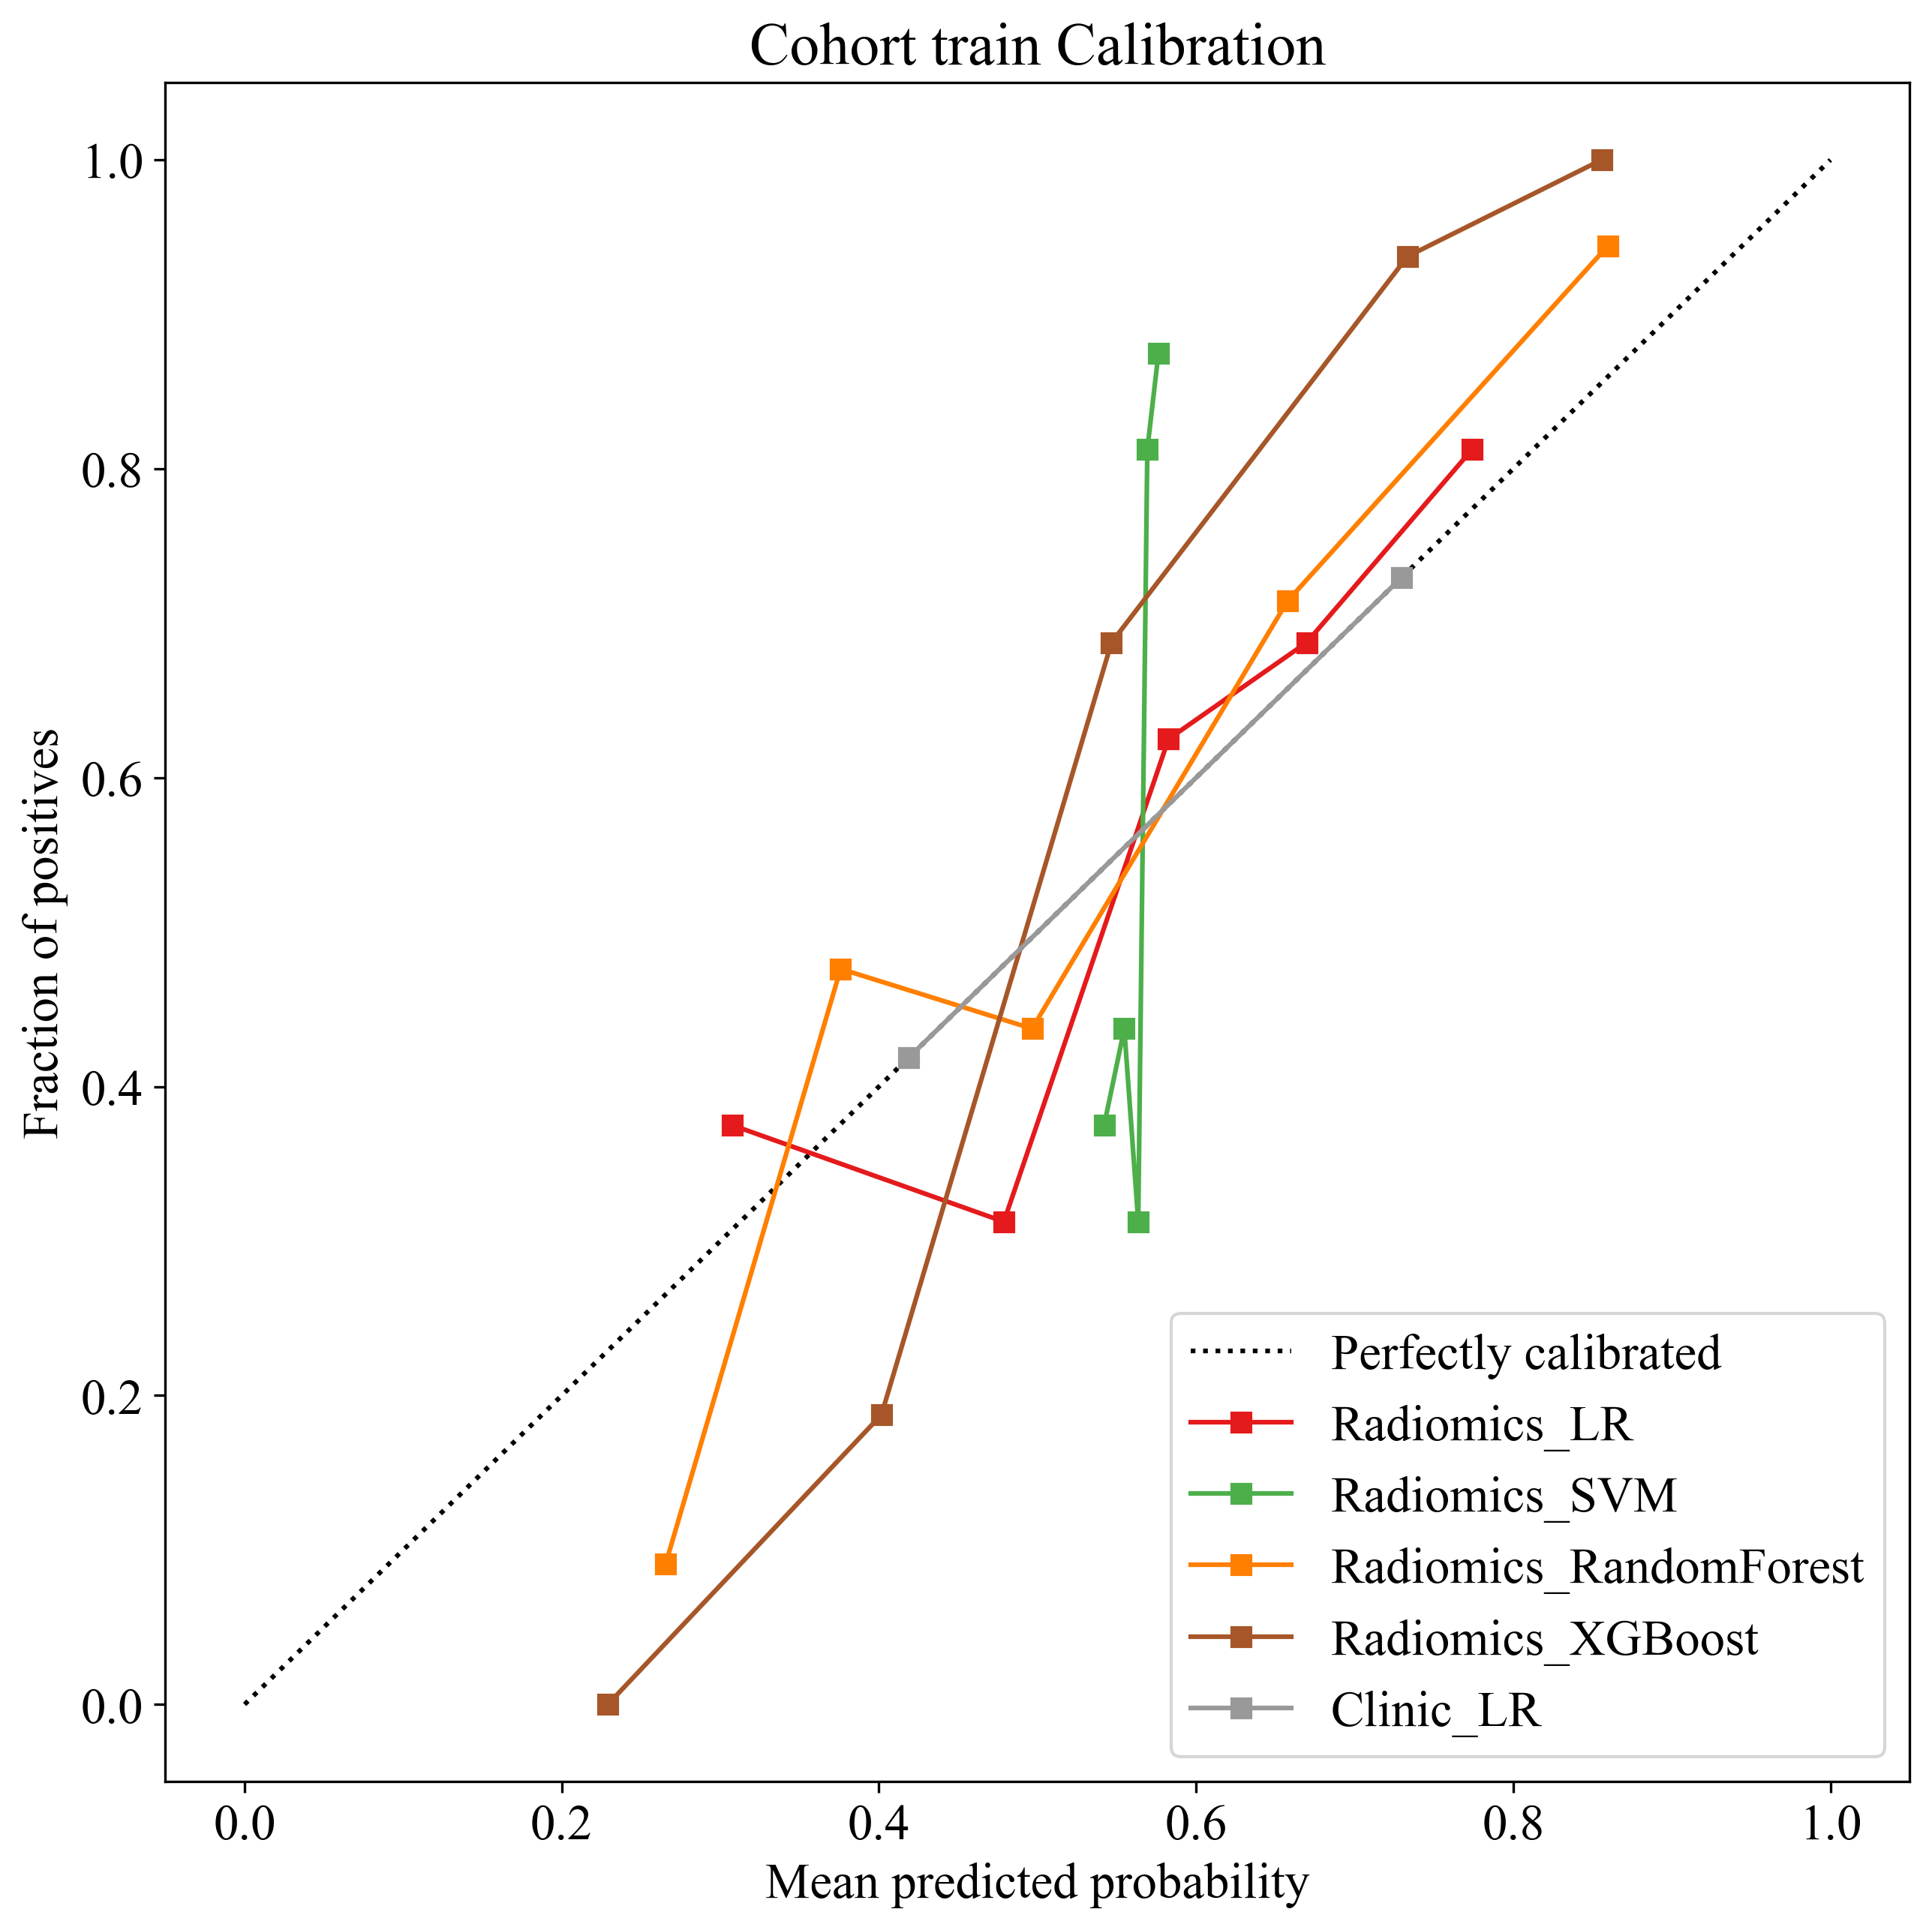

,ID,-0_x,Radiomics_LR,-0_y,Radiomics_SVM,-0_x,Radiomics_RandomForest,-0_y,Radiomics_XGBoost,-0,Clinic_LR,suoguxia,group,label


ValueError: y_true takes value in {} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [2]:
import pandas as pd
from onekey_algo.custom.components.comp1 import normalize_df, merge_results
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from onekey_algo.custom.components import metrics
from onekey_algo.custom.components.delong import delong_roc_test
from onekey_algo.custom.components.comp1 import draw_matrix
from onekey_algo.custom.components.metrics import NRI, IDI
from onekey_algo.custom.components.comp1 import plot_DCA
from onekey_algo.custom.components.comp1 import draw_calibration
from onekey_algo.custom.components import stats
from onekey_algo.custom.components.metrics import analysis_pred_binary

hosmer = []
youden = {}
metric = []
fig_size = (5, 4)
for subset in [s for s in get_param_in_cwd('subsets', ['train', 'test'])]:
    ALL_results = None
    for mn in  model_names:
        r = pd.read_csv(f"./results/{mn}_{subset if subset == 'train' else 'test'}.csv")
        r.columns = ['ID', '-0', mn]
        if ALL_results is None:
            ALL_results = r
        else:
            ALL_results = pd.merge(ALL_results, r, on='ID', how='inner')
    Clinic = pd.read_csv('data/clinic_sel.csv')
    cnames = [c for c in Clinic.columns if c not in ['ID', 'group', 'label']]
    ALL_results =merge_results(ALL_results, Clinic[['ID'] + cnames], label_data[label_data['group'] == subset], label_col='ID')
    ALL_results = ALL_results.dropna(axis=1)
    display(ALL_results)
    # 绘制整体的ROC曲线
    pred_column = [f'{task}-0', f'{task}-1']
    gt = [np.array(ALL_results[task]) for _ in model_names]
    pred_train = [np.array(ALL_results[d]) for d in model_names]
    okcomp.comp1.draw_roc(gt, pred_train, labels=model_names, title=f'Cohort {subset} ROC', auto_point=False)
    plt.savefig(f'img/mc_{subset}_auc.svg')
    plt.show()
    
    # 汇总所有的Metric
    for mname, y, score in zip(model_names, gt, pred_train):
        # 计算验证集指标
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y, score)
        ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
        youden[mname] = thres
        metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, subset))
    metric_ = pd.DataFrame(metric, index=None, columns=['Signature', 'Accuracy', 'AUC', '95% CI',
                                                       'Sensitivity', 'Specificity', 
                                                       'PPV', 'NPV', 'Precision', 'Recall', 'F1',
                                                       'Threshold', 'Cohort'])

    display(metric_)
    
    # 绘制Delong
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=fig_size)
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            if i <= j:
                cm[i][j] = np.nan
            else:
                cm[i][j] = delong_roc_test(ALL_results[task], ALL_results[mni], ALL_results[mnj])[0][0]
    cm = pd.DataFrame(cm[1:, :-1], index=model_names[1:], columns=model_names[:-1])
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} Delong')
    plt.savefig(f'img/mc_delong_each_cohort_{subset}.svg', bbox_inches = 'tight')
    plt.show()
    
    # NRI
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=fig_size)
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            cm[i][j] = NRI(ALL_results[mni] > youden[mni], ALL_results[mnj] > youden[mnj], ALL_results[task])
    cm = pd.DataFrame(cm, index=model_names, columns=model_names)
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} NRI')
    plt.savefig(f'img/mc_NRI_each_cohort_{subset}.svg', bbox_inches = 'tight')
    plt.show()
    
    # IDI
    delong = []
    delong_columns = []
    this_delong = []
    cm = np.zeros((len(model_names), len(model_names)))
    p = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            cm[i][j], p[i][j] = IDI(ALL_results[mni], ALL_results[mnj], ALL_results[task], with_p=True)

    for d, n in zip([cm, p], ['IDI', 'IDI pvalue']):
        plt.figure(figsize=fig_size)
        d = pd.DataFrame(d, index=model_names, columns=model_names)
        draw_matrix(d, annot=True, cmap='jet_r', cbar=True)
        plt.title(f'Cohort {subset} {n}')
        plt.savefig(f'img/mc_{n}_each_cohort_{subset}.svg', bbox_inches = 'tight')
        plt.show()
        
    # DCA
    plot_DCA([ALL_results[model_name] for model_name in model_names], 
             ALL_results[task], title=f'Cohort {subset} DCA', labels=model_names, y_min=-0.15)
    plt.savefig(f'img/mc_{subset}_dca.svg')
    plt.show()
    
    # Calibration
    draw_calibration(pred_scores=pred_train, n_bins=5,
                     y_test=gt, model_names=model_names)
    plt.title(f'Cohort {subset} Calibration')
    plt.savefig(f'img/mc_{subset}_cali.svg')
    plt.show()
    
    # HLTest
    hosmer.append([stats.hosmer_lemeshow_test(y_true, y_pred, bins=10) 
                  for fn, y_true, y_pred in zip(model_names, gt, pred_train)])
pd.concat([pd.DataFrame(hosmer, columns=model_names), pd.DataFrame(get_param_in_cwd('subsets'), columns=['Cohort'])], axis=1)